Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3442 - val_loss: 0.1612
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1521 - val_loss: 0.1261
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1222 - val_loss: 0.1075
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1059 - val_loss: 0.0970
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0961 - val_loss: 0.0898
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0894 - val_loss: 0.0848
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0846 - val_loss: 0.0813
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0813 - val_loss: 0.0789
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0793 - val_loss: 0.0773
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0777 - val_loss: 0.0762
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0767 - val_loss: 0.0754
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

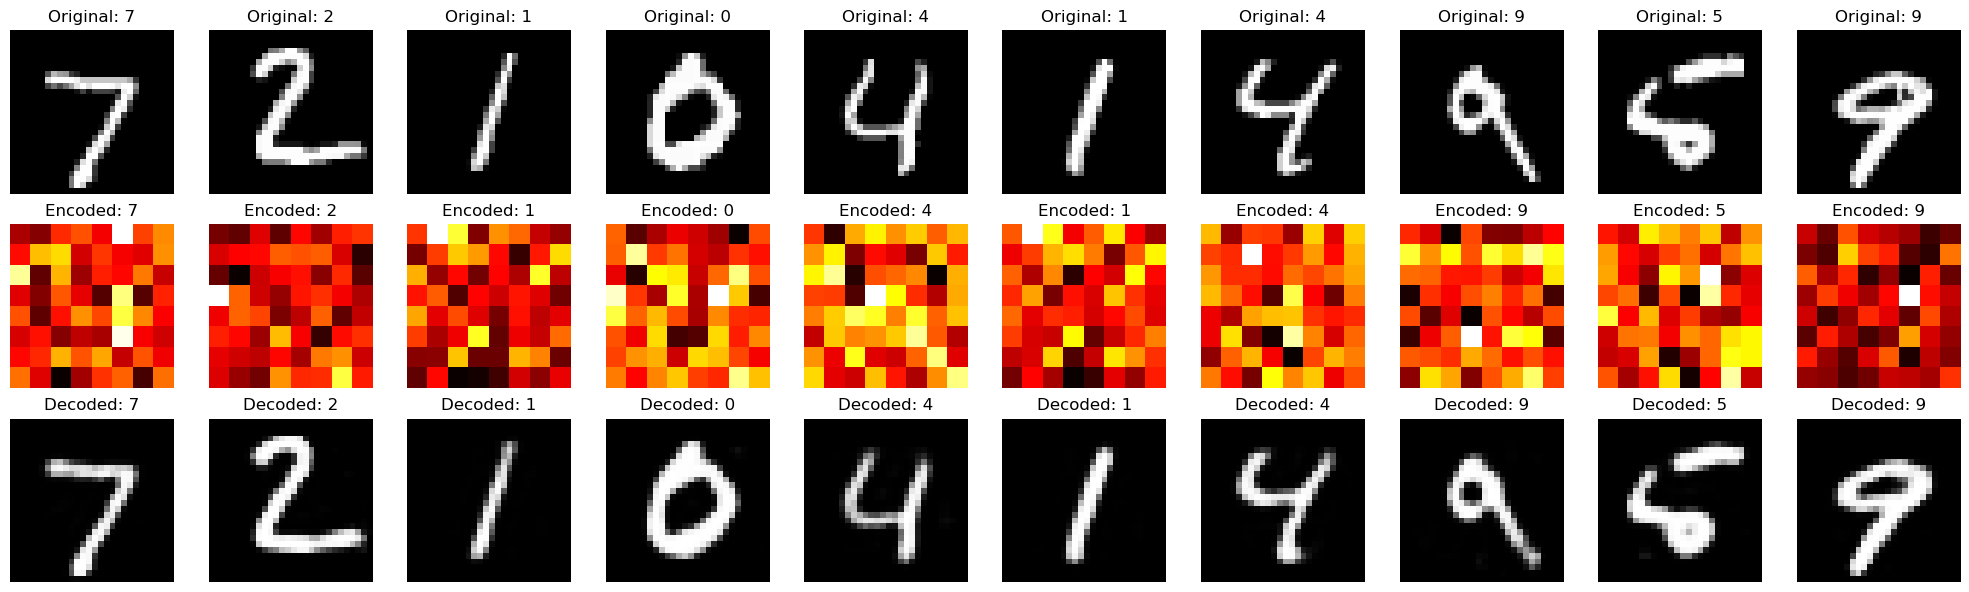

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to fit the model
x_train = np.reshape(x_train, (len(x_train), 28 * 28))
x_test = np.reshape(x_test, (len(x_test), 28 * 28))

# Build the Autoencoder model
encoding_dim = 64  # Dimension of the encoded representation

# Input Layer
input_img = layers.Input(shape=(28 * 28,))

# Encoder
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = layers.Dense(28 * 28, activation='sigmoid')(encoded)

# Autoencoder Model
autoencoder = models.Model(input_img, decoded)

# Encoder Model
encoder = models.Model(input_img, encoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original, encoded (as heatmap), and reconstructed images with labels
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Original: {y_test[i]}')  # Label for the original image
    plt.axis('off')

    # Encoded images (heatmap)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 8), cmap='hot')  # Reshape for visualization
    plt.title(f'Encoded: {y_test[i]}')  # Label for the encoded image
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title(f'Decoded: {y_test[i]}')  # Label for the reconstructed image
    plt.axis('off')

plt.tight_layout()
plt.show()
